In [1]:
! pip install tensorflow;

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

#normalizes in L-2 order (square root of the sum of the squares)
X = tf.keras.utils.normalize(X, axis = -1, order = 2);
y = np.array(y)

In [4]:
def create_model():
    model = tf.keras.Sequential()
    #number of filters, kernal size, input shape is such because we don't need batch size
    #dimension of kernal has to be an odd integer, 1,3,5,7 are common
    model.add(Conv2D(32,(3,3), input_shape = X.shape[1:])) 
#     model.add(Conv2D(16,(3,3)))
#     model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2))) #choosing 2 because recommended
    model.add(Activation("relu"))

    model.add(Conv2D(64,(3,3))) #after the first layer, you don't need to specify the size of input anymore
#     model.add(Conv2D(32,(3,3)))
#     model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2))) #choosing 2 because recommended
    model.add(Activation("relu"))

    model.add(Flatten())
#     model.add(Dropout(0.5))
    model.add(Dense(64))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss="binary_crossentropy",
                  optimizer="adam",
                 metrics=['accuracy'])
    #consider using CategorialCrossentropy when we have multiple classes
    
    model.save('CNN_adult_v1.model')
    return model
    

In [5]:
model = create_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN_adult_v1.model/assets


In [ ]:
# model.fit(X,y, batch_size = 32, epochs = 30, validation_split = 0.1) #10% split

In [6]:
#Future Direction
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [7]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
145/145 [==============================] - 11s 76ms/step - loss: 0.7652 - accuracy: 0.5737
Epoch 2/30
145/145 [==============================] - 11s 79ms/step - loss: 0.6272 - accuracy: 0.6619
Epoch 3/30
145/145 [==============================] - 12s 79ms/step - loss: 0.5047 - accuracy: 0.7782
Epoch 4/30
145/145 [==============================] - 12s 84ms/step - loss: 0.4116 - accuracy: 0.8214
Epoch 5/30
145/145 [==============================] - 12s 81ms/step - loss: 0.3823 - accuracy: 0.8375
Epoch 6/30
145/145 [==============================] - 12s 80ms/step - loss: 0.3659 - accuracy: 0.8516
Epoch 7/30
145/145 [==============================] - 12s 84ms/step - loss: 0.3582 - accuracy: 0.8477
Epoch 8/30
145/145 [==============================] - 12s 83ms/step - loss: 0.3403 - accuracy: 0.8608
Epoch 9/30
145/145 [==============================] - 12s 82ms/step - loss: 0.3369 - accuracy: 0.8576
Epoch 10/30
145/145 [==============================] - 12s 81ms/step - loss: 0.329

In [9]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [10]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

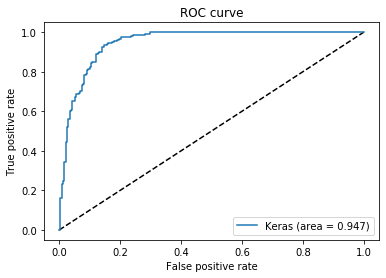

In [11]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [33]:
import pandas as pd
dataset = pd.DataFrame({'TPR': tpr_keras, 'FPR': fpr_keras})
dataset['FNR'] = 1-dataset['TPR']
dataset['TNR'] = 1-dataset['FPR']
dataset['Sensitivity'] = dataset['TPR']/(dataset['TPR']+dataset['FNR'])*100
dataset['Specificity'] = dataset['TNR']/(dataset['FPR']+dataset['TNR'])*100

In [34]:
dataset.to_excel("CNN_Metrics.xlsx") 

In [ ]:
#Future Direction
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
#                                                             y_train,
#                                                             test_size=0.1)

In [ ]:
#Stethaid Approach
from sklearn import svm
clf = svm.SVC(kernel='linear')


In [8]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

ValueError: Found array with dim 4. Estimator expected <= 2.